In [4]:
from google.colab import files

uploaded = files.upload()

Saving df_full_premierleague.csv to df_full_premierleague.csv


In [3]:
#ALL PREMIER LEAGUE SOCCER MATCHES FROM 2010 - 2021#
#SOURCE - https://www.kaggle.com/pablohfreitas/all-premier-league-matches-20102021

In [161]:
#PACKAGES
import pandas as pd
import numpy as np
import sklearn

In [279]:
#Load Data
df = pd.read_csv('./df_full_premierleague.csv')

In [280]:
df.head()

Unnamed: 0  ... performance_acum_away
0           0  ...                  55.6
1           1  ...                  60.2
2           2  ...                  66.7
3           3  ...                  66.7
4           4  ...                  58.7

[5 rows x 114 columns]

In [281]:
#Get rid of links and unamed column
df.drop(df.columns[[0, 1]], axis=1, inplace=True)

In [282]:
#Typecasting columns from object to string
df["home_team"] = df["home_team"].astype(str)
df["away_team"] = df["away_team"].astype(str)
df["result_full"] = df["result_full"].astype(str)
df["result_ht"] = df["result_ht"].astype(str)

In [283]:
#Splitting ft-scores into home and away
df[["home_result_full", "away_result_full"]] = df.result_full.str.split("-", expand=True)

#Moving columns to beginning of df
df.insert(4,"home_result_ft", df["home_result_full"])
df.insert(5, "away_result_ft", df["away_result_full"])
df = df.drop(df.columns[[-1, -2]], axis=1) 

In [284]:
#Splitting ht-scores into home and away
df[["home_result_halftime", "away_result_halftime"]] = df.result_ht.str.split("-", expand=True)

#Moving columns to beginning of df
df.insert(8,"home_result_ht", df["home_result_halftime"])
df.insert(9, "away_result_ht", df["away_result_halftime"])
df = df.drop(df.columns[[-1, -2]], axis=1) 

In [285]:
#Dropping result_full and result_half
df.drop('result_full', axis=1, inplace=True)
df.drop('result_ht', axis=1, inplace=True)

In [286]:
#Converting results ft and ht to int
df[['home_result_ft', 'away_result_ft', 'home_result_ht', 'away_result_ht']] = df[['home_result_ft', 'away_result_ft', 'home_result_ht', 'away_result_ht']].astype(int)

In [287]:
#Creating a win/loss/draw column for target (2:Win, 1:Draw, 0:Lose) Did Home Team Win/Lose/Draw
comparison_column = np.where(df["home_result_ft"] > df["away_result_ft"], 2, 0)
comparison_column = np.where(df["home_result_ft"] == df["away_result_ft"], 1, comparison_column)

#TEST
comparison_column[0:5]

array([2, 2, 2, 2, 1])

In [288]:
df.insert(114,"result", comparison_column)

In [289]:
df.head()

season        date  ... performance_acum_away result
0  10/11  2010-11-01  ...                  55.6      2
1  10/11  2011-04-11  ...                  60.2      2
2  10/11  2010-12-13  ...                  66.7      2
3  10/11  2010-09-13  ...                  66.7      2
4  10/11  2011-02-14  ...                  58.7      1

[5 rows x 115 columns]

In [290]:
#Need to fix non-numeric columns -> Season, Date, Home_Team, Away_Team, Result_Full, Result_HT
df.dtypes

season                       object
date                         object
home_team                    object
away_team                    object
home_result_ft                int64
away_result_ft                int64
home_result_ht                int64
away_result_ht                int64
home_clearances             float64
home_corners                float64
home_fouls_conceded         float64
home_offsides               float64
home_passes                 float64
home_possession             float64
home_red_cards              float64
home_shots                  float64
home_shots_on_target        float64
home_tackles                float64
home_touches                float64
home_yellow_cards           float64
away_clearances             float64
away_corners                float64
away_fouls_conceded         float64
away_offsides               float64
away_passes                 float64
away_possession             float64
away_red_cards              float64
away_shots                  

In [291]:
#Records & Features
df.shape

(4070, 115)

In [292]:
#General Statistics
df.describe()

home_result_ft  away_result_ft  ...  performance_acum_away       result
count     4070.000000     4070.000000  ...            3960.000000  4070.000000
mean         1.535627        1.200737  ...              45.921692     1.147420
std          1.304315        1.175965  ...              19.579283     0.856006
min          0.000000        0.000000  ...               0.000000     0.000000
25%          1.000000        0.000000  ...              33.300000     0.000000
50%          1.000000        1.000000  ...              42.900000     1.000000
75%          2.000000        2.000000  ...              58.600000     2.000000
max          9.000000        9.000000  ...             100.000000     2.000000

[8 rows x 111 columns]

In [132]:
'''
#Unique Values Home
print(len(pd.unique(df['home_team'])))

#Encode Teams with Numeric Values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['home_team'])

#Test That num of labels == num of teams
list(le.classes_)
print(len(list(le.classes_)))
'''

"\n#Unique Values Home\nprint(len(pd.unique(df['home_team'])))\n\n#Encode Teams with Numeric Values\nfrom sklearn import preprocessing\nle = preprocessing.LabelEncoder()\nle.fit(df['home_team'])\n\n#Test That num of labels == num of teams\nlist(le.classes_)\nprint(len(list(le.classes_)))\n"

In [293]:
#Encode Teams with Numeric Values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['h_team'] = labelencoder.fit_transform(df['home_team'])
df['a_team'] = labelencoder.fit_transform(df['away_team'])

In [294]:
#Moving Encoded Labels to the Beginning
df.insert(2,"home_t", df["h_team"])
df.insert(3, "away_t", df["a_team"])

#Dropping Last Encoded Columns
df = df.drop(df.columns[[-1, -2]], axis=1) 

In [295]:
#Drop Home Team & Away Team String Labels
df.drop('home_team', axis=1, inplace=True)
df.drop('away_team', axis=1, inplace=True)

In [296]:
#Drop Date & Season
df.drop('season', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)

In [297]:
#We have some NaN values causing erros in the classifier
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)

#NaN enitre dataframe
nan_values = df.isna().any()

print(nan_values)

home_t                      False
away_t                      False
home_result_ft              False
away_result_ft              False
home_result_ht              False
away_result_ht              False
home_clearances             False
home_corners                False
home_fouls_conceded         False
home_offsides               False
home_passes                 False
home_possession             False
home_red_cards              False
home_shots                  False
home_shots_on_target        False
home_tackles                False
home_touches                False
home_yellow_cards           False
away_clearances             False
away_corners                False
away_fouls_conceded         False
away_offsides               False
away_passes                 False
away_possession             False
away_red_cards              False
away_shots                  False
away_shots_on_target        False
away_tackles                False
away_touches                False
away_yellow_ca

In [298]:
#NaN for specific columns to see if we need to drop entire df column or just a few rows

df['fouls_conceded_avg_H'].isna().sum()

#Not all entries corruped, therefore going to drop all rows with NaN values

220

In [299]:
#Drop all rows with NaN

df = df.dropna()

In [300]:
#DF shape after dropping NaN

df.shape

(3841, 113)

In [301]:
df[0:5]

home_t  away_t  ...  performance_acum_away  result
0       5      33  ...                   55.6       2
1      18      19  ...                   60.2       2
2      20       1  ...                   66.7       2
3      28       2  ...                   66.7       2
4      13      10  ...                   58.7       1

[5 rows x 113 columns]

In [302]:
X = df.iloc[:, 0:112].values
y = df.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [303]:
#DECISION TREE CLASSIFIER#
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state = 0)
classifier.fit(X_train, y_train) 
# ====> INSERT YOUR CLASSIFIER CODE HERE <====

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[283   0   0]
 [  0 233   0]
 [  0   0 445]]


In [304]:
#RESULTS VECTOR
dt = []
dt.append("Decision Tree")
dt.append(cm)

In [305]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
dt.append(accuracy)
print(accuracy)

1.0


In [306]:
#F-1 Score
from sklearn.metrics import f1_score
f_score = f1_score(y_test, y_pred, average=None)
dt.append(f_score)
print(f_score)

[1. 1. 1.]


In [307]:
#Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average=None)
dt.append(recall)
print(recall)

[1. 1. 1.]


In [308]:
#Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average=None)
dt.append(precision)
print(precision)

[1. 1. 1.]


In [309]:
#R_Score
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)
dt.append(r_score)
print(r_score)

1.0


In [160]:
#100% Accurate but this seems wrong, I think this is because I fed it the goals scored in the match which in hindsight 
#should obviously allow it to see that whoever scores the most goals wins

In [310]:
#Features

feature_cols = df.axes[1].tolist()
feature_cols = feature_cols[0:112]
len(feature_cols)
feature_cols[-1]

'performance_acum_away'

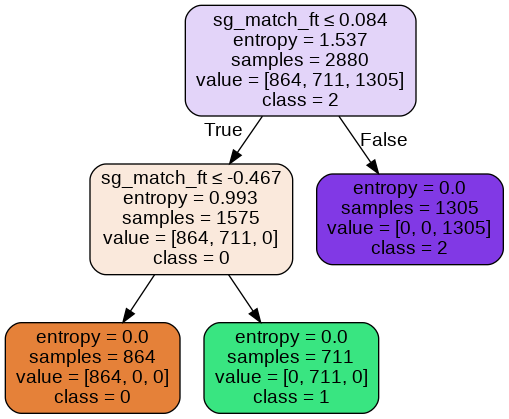

In [311]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dt_soccer.png')
Image(graph.create_png())

In [181]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(X_train)
pca.explained_variance_ratio_
principalComponents.shape

array([0.1842047 , 0.13804962, 0.05008468, 0.04828107, 0.03235162,
       0.0299295 , 0.02690811, 0.02367609, 0.02351646, 0.0192776 ,
       0.01822996, 0.0160839 , 0.01593147, 0.0149607 , 0.01475013,
       0.01379189, 0.01341248, 0.01306912, 0.01259456, 0.01210145,
       0.01103096, 0.01014569, 0.00995808, 0.00983611, 0.00924782,
       0.00899446, 0.00889046, 0.00862294, 0.0084237 , 0.00835692,
       0.00793948, 0.00767406, 0.00763335, 0.00738502, 0.00712613,
       0.0068693 , 0.0064542 , 0.00619501, 0.00607205, 0.00584794,
       0.00571377, 0.00548474, 0.00533078, 0.00512082, 0.00507815,
       0.00474203, 0.00464463, 0.00456995, 0.00438839, 0.00370633,
       0.00358988, 0.00326301, 0.00309422, 0.00308822, 0.00296899,
       0.00289427])

In [185]:
######################################################################

In [193]:
#RANDOM FOREST CLASSIFIER#
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state = 0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [194]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[281   2   0]
 [  3 226   4]
 [  1  15 429]]


In [195]:
#RESULTS VECTOR
rf = []
rf.append("Random Forest")
rf.append(cm)

In [196]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
rf.append(accuracy)
print(accuracy)

0.9739854318418314


In [197]:
#F-1 Score
from sklearn.metrics import f1_score
f_score = f1_score(y_test, y_pred, average=None)
rf.append(f_score)
print(f_score)

[0.98943662 0.94957983 0.97722096]


In [198]:
#Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average=None)
rf.append(recall)
print(recall)

[0.99293286 0.96995708 0.96404494]


In [199]:
#Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average=None)
rf.append(precision)
print(precision)

[0.98596491 0.93004115 0.99076212]


In [200]:
#R_Score
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)
rf.append(r_score)
print(r_score)

0.9600394437481066


In [189]:
######################################################################

In [201]:
#KNN CLASSIFIER

# Fitting classifier to the Training set
# Create your classifier here
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [202]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[235  41   7]
 [ 85  93  55]
 [ 37  65 343]]


In [203]:
#RESULTS VECTOR
knn = []
knn.append("KNN")
knn.append(cm)

In [204]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
knn.append(accuracy)
print(accuracy)

0.6982310093652445


In [205]:
#F-1 Score
from sklearn.metrics import f1_score
f_score = f1_score(y_test, y_pred, average=None)
knn.append(f_score)
print(f_score)

[0.734375   0.43055556 0.80705882]


In [206]:
#Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average=None)
knn.append(recall)
print(recall)

[0.83038869 0.39914163 0.77078652]


In [207]:
#Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average=None)
knn.append(precision)
print(precision)

[0.65826331 0.46733668 0.84691358]


In [208]:
#R_Score
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)
knn.append(r_score)
print(r_score)

0.3977373307750339


In [201]:
##########################################################################

In [209]:
#SUPPORT VECTOR MACHINES (SVM)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [210]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[283   0   0]
 [  0 233   0]
 [  0   0 445]]


In [211]:
#RESULTS VECTOR
svectorm = []
svectorm.append("SVM")
svectorm.append(cm)

In [212]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
svectorm.append(accuracy)
print(accuracy)

1.0


In [213]:
#F-1 Score
from sklearn.metrics import f1_score
f_score = f1_score(y_test, y_pred, average=None)
svectorm.append(f_score)
print(f_score)

[1. 1. 1.]


In [214]:
#Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average=None)
svectorm.append(recall)
print(recall)

[1. 1. 1.]


In [215]:
#Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average=None)
svectorm.append(precision)
print(precision)

[1. 1. 1.]


In [216]:
#R_Score
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)
svectorm.append(r_score)
print(r_score)

1.0


In [217]:
#CREATE COMPARISON TABLE

table = pd.DataFrame()
table['Classifier'] = None
table['Confusion Matrix'] = None
table['Accuracy'] = None
table['F-1 Score'] = None
table['Recall'] = None
table['Precision'] = None
table['R-Score'] = None

In [257]:
table

Empty DataFrame
Columns: [Classifier, Confusion Matrix, Accuracy, F-1 Score, Recall, Precision, R-Score]
Index: []

In [218]:
table.loc[0] = np.array(dt)
table.loc[1] = np.array(rf)
table.loc[2] = np.array(knn)
table.loc[3] = np.array(svectorm)
table

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify '

Classifier  ...   R-Score
0  Decision Tree  ...  1.000000
1  Random Forest  ...  0.960039
2            KNN  ...  0.397737
3            SVM  ...  1.000000

[4 rows x 7 columns]

In [ ]:
#DEFINITIONS

#PCA - How much information/variance can be attributed to each of the feature/principal component columns

#Confusion Matrix - Classifier with 100% accuracy would produce pure diagonal values, in this case: 
#0 = Lose, 1 = Draw, 2 = Win
'''
 0, 1, 2
0
1
2
'''

#Accuracy - Measure of (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives) if model is perfect, will give score of 1 or 100%

#Recall - How complete the predictions are (True Positive)/(True Positve + False Negatives)

#Precision - How useful the predictions are (True Positive)/(True Positve + False Positive) IN OTHER WORDS PRECISION CAN STILL BE 1 OR 100% EVEN IF WE MISS SOME OF THE OVERALL PREDICTIONS WHICH WOULD DENT RECALL

#F-1 Score - Converys the balance between PRECISION and RECALL  2*((precision*recall)/(precision+recall))

#R-Score - Relationship between target column and rest of features count for x% of the variation

In [219]:
#TEST 2 (Dropping Goals Scored)

#Load Data
df2 = pd.read_csv('./df_full_premierleague.csv')

In [220]:
#Get rid of links and unamed column
df2.drop(df2.columns[[0, 1]], axis=1, inplace=True)

In [221]:
#Typecasting columns from object to string
df2["home_team"] = df2["home_team"].astype(str)
df2["away_team"] = df2["away_team"].astype(str)
df2["result_full"] = df2["result_full"].astype(str)
df2["result_ht"] = df2["result_ht"].astype(str)

In [222]:
#Splitting ft-scores into home and away
df2[["home_result_full", "away_result_full"]] = df2.result_full.str.split("-", expand=True)

#Moving columns to beginning of df
df2.insert(4,"home_result_ft", df2["home_result_full"])
df2.insert(5, "away_result_ft", df2["away_result_full"])
df2 = df2.drop(df2.columns[[-1, -2]], axis=1) 

In [223]:
#Splitting ht-scores into home and away
df2[["home_result_halftime", "away_result_halftime"]] = df2.result_ht.str.split("-", expand=True)

#Moving columns to beginning of df
df2.insert(8,"home_result_ht", df2["home_result_halftime"])
df2.insert(9, "away_result_ht", df2["away_result_halftime"])
df2 = df2.drop(df2.columns[[-1, -2]], axis=1) 

In [224]:
#Dropping result_full and result_half
df2.drop('result_full', axis=1, inplace=True)
df2.drop('result_ht', axis=1, inplace=True)

In [225]:
#Converting results ft and ht to int
df2[['home_result_ft', 'away_result_ft', 'home_result_ht', 'away_result_ht']] = df2[['home_result_ft', 'away_result_ft', 'home_result_ht', 'away_result_ht']].astype(int)

In [226]:
#Creating a win/loss/draw column for target (2:Win, 1:Draw, 0:Lose) Did Home Team Win/Lose/Draw
comparison_column = np.where(df2["home_result_ft"] > df2["away_result_ft"], 2, 0)
comparison_column = np.where(df2["home_result_ft"] == df2["away_result_ft"], 1, comparison_column)

#TEST
comparison_column[0:5]

array([2, 2, 2, 2, 1])

In [227]:
df2.insert(114,"result", comparison_column)

In [228]:
#Encode Teams with Numeric Values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df2['h_team'] = labelencoder.fit_transform(df2['home_team'])
df2['a_team'] = labelencoder.fit_transform(df2['away_team'])

In [229]:
#Moving Encoded Labels to the Beginning
df2.insert(2,"home_t", df2["h_team"])
df2.insert(3, "away_t", df2["a_team"])

#Dropping Last Encoded Columns
df2 = df2.drop(df2.columns[[-1, -2]], axis=1) 

In [230]:
#Drop Home Team & Away Team String Labels
df2.drop('home_team', axis=1, inplace=True)
df2.drop('away_team', axis=1, inplace=True)

In [231]:
#Drop Date & Season
df2.drop('season', axis=1, inplace=True)
df2.drop('date', axis=1, inplace=True)

In [232]:
#Drop all rows with NaN

df2 = df2.dropna()

In [233]:
df2[0:5]

home_t  away_t  ...  performance_acum_away  result
0       5      33  ...                   55.6       2
1      18      19  ...                   60.2       2
2      20       1  ...                   66.7       2
3      28       2  ...                   66.7       2
4      13      10  ...                   58.7       1

[5 rows x 113 columns]

In [234]:
#Drop Results at Full Time & Half Time To Test Model

df2.drop('home_result_ft', axis=1, inplace=True)
df2.drop('away_result_ft', axis=1, inplace=True)
df2.drop('home_result_ht', axis=1, inplace=True)
df2.drop('away_result_ht', axis=1, inplace=True)

#Hidden near middle of feature columns
df2.drop('goal_home_ft', axis=1, inplace=True)
df2.drop('goal_away_ft', axis=1, inplace=True)
df2.drop('sg_match_ft', axis=1, inplace=True)
df2.drop('goal_home_ht', axis=1, inplace=True)
df2.drop('goal_away_ht', axis=1, inplace=True)
df2.drop('sg_match_ht', axis=1, inplace=True)

In [235]:
#We have some NaN values causing erros in the classifier
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)

#NaN enitre dataframe
nan_values = df2.isna().any()

print(nan_values)

home_t                      False
away_t                      False
home_clearances             False
home_corners                False
home_fouls_conceded         False
home_offsides               False
home_passes                 False
home_possession             False
home_red_cards              False
home_shots                  False
home_shots_on_target        False
home_tackles                False
home_touches                False
home_yellow_cards           False
away_clearances             False
away_corners                False
away_fouls_conceded         False
away_offsides               False
away_passes                 False
away_possession             False
away_red_cards              False
away_shots                  False
away_shots_on_target        False
away_tackles                False
away_touches                False
away_yellow_cards           False
clearances_avg_H            False
corners_avg_H               False
fouls_conceded_avg_H        False
offsides_avg_H

In [236]:
#New Shape
df2.shape

(3841, 103)

In [237]:
X = df2.iloc[:, 0:102].values
y = df2.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [160]:
print(df2.iloc[:, 0:102])
print(y)

      home_t  away_t  ...  sg_match_ht_acum_away  performance_acum_away
0          5      33  ...                   -4.0                   55.6
1         18      19  ...                   17.0                   60.2
2         20       1  ...                    9.0                   66.7
3         28       2  ...                    0.0                   66.7
4         13      10  ...                    9.0                   58.7
6          4      29  ...                    0.0                   38.1
7         19      12  ...                   -4.0                   35.3
8         29      12  ...                   -2.0                   38.5
10         6      10  ...                    7.0                   57.6
11         4      19  ...                   14.0                   58.3
12         1      10  ...                    9.0                   60.8
13        28      33  ...                  -11.0                   34.6
14        18       2  ...                   -1.0                

In [238]:
#DECISION TREE CLASSIFIER#
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state = 0)
classifier.fit(X_train, y_train) 
# ====> INSERT YOUR CLASSIFIER CODE HERE <====

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[153  71  59]
 [ 84  64  85]
 [ 68 111 266]]


In [239]:
#RESULTS VECTOR
dt_two = []
dt_two.append("Decision Tree")
dt_two.append(cm)

In [240]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
dt_two.append(accuracy)
print(accuracy)

0.5026014568158168


In [241]:
#F-1 Score
from sklearn.metrics import f1_score
f_score = f1_score(y_test, y_pred, average=None)
dt_two.append(f_score)
print(f_score)

[0.52040816 0.26722338 0.62222222]


In [242]:
#Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average=None)
dt_two.append(recall)
print(recall)

[0.54063604 0.27467811 0.59775281]


In [243]:
#Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average=None)
dt_two.append(precision)
print(precision)

[0.50163934 0.2601626  0.64878049]


In [244]:
#R_Score
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)
dt_two.append(r_score)
print(r_score)

-0.22593277929916078


In [ ]:
#Even after dropping all categories related to goals in the match, the decision tree still produced 100% in every category ####MAJOR FIX, I HAD THE RESULTS COLUMN IN THE TRAIN DATASET### RESULTS MORE ACCURATE NOW
#Interesting way to visualize tree found - https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [128]:
!pip install graphviz
!pip install pydotplus

In [249]:
#Features

feature_cols = df2.axes[1].tolist()
feature_cols = feature_cols[0:102]
len(feature_cols)

'performance_acum_away'

In [250]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dt_soccer.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.713179 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.713179 to fit



In [97]:
####################################################################

In [251]:
#RANDOM FOREST CLASSIFIER#
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state = 0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [252]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[176  33  74]
 [ 94  42  97]
 [ 92  65 288]]


In [253]:
#RESULTS VECTOR
rf_two = []
rf_two.append("Random Forest")
rf_two.append(cm)

In [254]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
rf_two.append(accuracy)
print(accuracy)

0.5265348595213319


In [255]:
#F-1 Score
from sklearn.metrics import f1_score
f_score = f1_score(y_test, y_pred, average=None)
rf_two.append(f_score)
print(f_score)

[0.54573643 0.22520107 0.63716814]


In [256]:
#Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average=None)
rf_two.append(recall)
print(recall)

[0.62190813 0.18025751 0.64719101]


In [257]:
#Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average=None)
rf_two.append(precision)
print(precision)

[0.48618785 0.3        0.62745098]


In [258]:
#R_Score
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)
rf_two.append(r_score)
print(r_score)

-0.36008607528766023


In [106]:
################################################################

In [259]:
#KNN CLASSIFIER

# Fitting classifier to the Training set
# Create your classifier here
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [260]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[183  41  59]
 [112  54  67]
 [101  86 258]]


In [261]:
#RESULTS VECTOR
knn_two = []
knn_two.append("KNN")
knn_two.append(cm)

In [262]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
knn_two.append(accuracy)
print(accuracy)

0.5150884495317378


In [263]:
#F-1 Score
from sklearn.metrics import f1_score
f_score = f1_score(y_test, y_pred, average=None)
knn_two.append(f_score)
print(f_score)

[0.53902798 0.26086957 0.62243667]


In [264]:
#Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average=None)
knn_two.append(recall)
print(recall)

[0.64664311 0.23175966 0.57977528]


In [265]:
#Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average=None)
knn_two.append(precision)
print(precision)

[0.46212121 0.29834254 0.671875  ]


In [266]:
#R_Score
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)
knn_two.append(r_score)
print(r_score)

-0.35009593622468693


In [115]:
#########################################################

In [267]:
#SUPPORT VECTOR MACHINES (SVM)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [268]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[201  43  39]
 [ 85  63  85]
 [ 43  64 338]]


In [269]:
#RESULTS VECTOR
svectorm_two = []
svectorm_two.append("SVM")
svectorm_two.append(cm)

In [270]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
svectorm_two.append(accuracy)
print(accuracy)

0.6264308012486993


In [271]:
#F-1 Score
from sklearn.metrics import f1_score
f_score = f1_score(y_test, y_pred, average=None)
svectorm_two.append(f_score)
print(f_score)

[0.65686275 0.31265509 0.74531422]


In [272]:
#Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average=None)
svectorm_two.append(recall)
print(recall)

[0.71024735 0.27038627 0.75955056]


In [273]:
#Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average=None)
svectorm_two.append(precision)
print(precision)

[0.61094225 0.37058824 0.73160173]


In [274]:
#R_Score
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)
svectorm_two.append(r_score)
print(r_score)

0.1365665524144445


In [275]:
#CREATE COMPARISON TABLE

table_two = pd.DataFrame()
table_two['Classifier'] = None
table_two['Confusion Matrix'] = None
table_two['Accuracy'] = None
table_two['F-1 Score'] = None
table_two['Recall'] = None
table_two['Precision'] = None
table_two['R-Score'] = None

In [276]:
table_two.loc[0] = np.array(dt_two)
table_two.loc[1] = np.array(rf_two)
table_two.loc[2] = np.array(knn_two)
table_two.loc[3] = np.array(svectorm_two)
table_two

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify '

Classifier  ...   R-Score
0  Decision Tree  ... -0.225933
1  Random Forest  ... -0.360086
2            KNN  ... -0.350096
3            SVM  ...  0.136567

[4 rows x 7 columns]